<a href="https://colab.research.google.com/github/cu-mkp/word-embeddings/blob/main/WordEmbeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mounting drive

! git clone https://github.com/cu-mkp/manuscript-object
! git clone https://github.com/cu-mkp/m-k-manuscript-data


fatal: destination path 'manuscript-object' already exists and is not an empty directory.
fatal: destination path 'm-k-manuscript-data' already exists and is not an empty directory.


In [2]:
%cd manuscript-object/

/home/sophiaqureshi/manuscript-object


In [13]:
! pip install pipenv

In [14]:
! pipenv install

Creating a virtualenv for this project...
Pipfile: /home/sophiaqureshi/manuscript-object/manuscript-object/Pipfile
Using /opt/conda/bin/python3.7m (3.7.12) to create virtualenv...
⠼ Creating virtual environment...created virtual environment CPython3.7.12.final.0-64 in 181ms
  creator CPython3Posix(dest=/home/sophiaqureshi/.local/share/virtualenvs/manuscript-object-7AjutM93, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/home/sophiaqureshi/.local/share/virtualenv)
    added seed packages: pip==22.0.4, setuptools==62.1.0, wheel==0.37.1
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator

✔ Successfully created virtual environment! 
Virtualenv location: /home/sophiaqureshi/.local/share/virtualenvs/manuscript-object-7AjutM93
Installing dependencies from Pipfile.lock (31d837)...
  🐍   ▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉ 83/83 — 00:

In [17]:
! pip install lxml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 32.3 MB/s eta 0:00:00


In [ ]:
from manuscript import *
import utils

m = Manuscript.from_dirs(*utils.version_paths)

properties = ['animal', 'body_part', 'currency', 'definition', 'environment', 'material',
              'medical', 'measurement', 'music', 'plant', 'place', 'personal_name',
              'profession', 'sensory', 'tool', 'time']
  


In [9]:
words_tl = {}
words_tcn = {}

#loops through each entry in the manuscript and extracts the values for each property
#for each word in the property list, adds an entry to the dictionary by language
#each word is mapped to a dictionary where each key is an entry id and each value is a list of semantic tags 
#associated with that word in the entry
for lang, entries in m.entries.items():
  if lang == "tl":
    for entry in entries.values():
      for prop in properties:
        pwords = entry.properties[prop] 
        for pw in pwords: 
          if pw not in words_tl:
            words_tl[pw] = {}
          if entry.identity not in words_tl[pw]:
            words_tl[pw][entry.identity]=[]
          words_tl[pw][entry.identity].append(prop)
  if lang == "tcn":
    for entry in entries.values():
      for prop in properties:
        pwords = entry.properties[prop] 
        for pw in pwords: 
          if pw not in words_tcn:
            words_tcn[pw] = {}
          if entry.identity not in words_tcn[pw]:
            words_tcn[pw][entry.identity]=[]
          words_tcn[pw][entry.identity].append(prop)

print(words_tl)
print(words_tcn)


    
  

{'metal': {'48r1': ['material'], '131v1': ['material'], '84v4': ['material'], '68r3': ['material'], '69r2': ['material', 'material', 'material'], '99v2': ['material', 'material'], '136v1': ['material', 'material'], '141r1': ['material'], '153r1': ['material', 'material', 'material'], '125v3': ['material'], '67r3': ['material', 'material'], '133v3': ['material'], '42r1': ['material'], '16r1': ['material'], '143r3': ['material', 'material'], '23r1': ['material'], '23v1': ['material'], '17r1': ['material', 'material', 'material', 'material', 'material', 'material', 'material', 'material', 'material', 'material', 'material', 'material', 'material', 'material', 'material'], '154r5': ['material'], '124v3': ['material', 'material', 'material'], '114r1': ['material'], '167r1': ['material', 'material'], '81r1': ['material', 'material'], '81r3': ['material'], '83v2': ['material', 'material'], '139r1': ['material', 'material'], '128r1': ['material', 'material', 'material'], '88r2': ['material'], 

In [ ]:
#install Huggingface transformers

!pip3 install transformers

In [4]:
#from https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/
import torch
from transformers import BertTokenizer, BertModel

import matplotlib.pyplot as plt
%matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [22]:
# tokenizing an example entry
#e = m.entries['tl']['24r1'].text

#preprocess the text 
#e_lowercase = e.lower()
#e_split = e_lowercase.split()
#print(e_split)

In [25]:
e_split.pop(0) #removing title of entry
e_sentences = []
current_sentence = []
for w in e_split:
  current_sentence.append(w)
  if "." in w:
    current_sentence = " ".join(current_sentence)
    current_sentence = "[CLS] " + current_sentence + " [SEP]"
    e_sentences.append(current_sentence)
    current_sentence = []

print(e_sentences)

['[CLS] grenades must be made from the finest metal one can find, for there is fine metal and crude metal. [SEP]', '[CLS] fine metal is that of a large bell, because one puts in more copper to give it a bigger voice, & for small bells one puts more tin to give it a <-bigger-> clearer sound. [SEP]', '[CLS] the metal of a large bell is made <-one-> with 3 quintals of rosette & twenty or xxv lb of tin. [SEP]', '[CLS] <-tan-> each grenade must weigh four to six lb. [SEP]', '[CLS] and in order to throw them, it is necessary that they be full of powder mixed with coarsely pestled glass. [SEP]', '[CLS] and for a quarter lb of powder, one needs half an ounce of glass which is put with it, in order that on the face or places where the powder will have its effect, the wounds will be all the worse for it. [SEP]', '[CLS] the best arquebus powder is required here. [SEP]', '[CLS] the hole needs to be as large as the thickness of a swan’s quill, & you need not bother to make it threaded, but it is en

In [26]:
marked_text = e_sentences[0]

tokenized_text = tokenizer.tokenize(marked_text)
print(tokenized_text)

['[CLS]', 'grenades', 'must', 'be', 'made', 'from', 'the', 'finest', 'metal', 'one', 'can', 'find', ',', 'for', 'there', 'is', 'fine', 'metal', 'and', 'crude', 'metal', '.', '[SEP]']


In [ ]:
tokenized_batch = tokenizer(e_sentences, padding=True, return_tensors="pt")
print(tokenized_batch)

In [ ]:
#load the model for English
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )
model.eval()

#with torch.no_grad():
#outputs = model(**tokenized_batch)

  # Evaluating the model will return a different number of objects based on 
  # how it's  configured in the `from_pretrained` call earlier. In this case, 
  # becase we set `output_hidden_states = True`, the third item will be the 
  # hidden states from all layers. See the documentation for more details:
  # https://huggingface.co/transformers/model_doc/bert.html#bertmodel

  #hidden_states = outputs[2]

In [ ]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("Number of batches:", len(hidden_states[layer_i]))
batch_i = 0

print ("Number of tokens:", len(hidden_states[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(hidden_states[layer_i][batch_i][token_i]))

Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 17
Number of tokens: 52
Number of hidden units: 768


In [39]:
#extract sentences for each tagged word (tl)

#entries_by_word_tl = {}
entries_by_id_tl = {}

for word in words_tl:
  entries = []
  for entry in words_tl[word]:
    #ce = "[CLS] " + m.entries['tl'][entry].text + " [SEP]"
    #entries.append(ce)
    if entry not in entries_by_id_tl:
      entries_by_id_tl[entry] = entry

  #entries_by_word_tl[word] = tokenized_entries


In [ ]:
! pip3 install sacremoses

In [40]:
#importing French tokenizer and model
from transformers import FlaubertModel, FlaubertTokenizer
modelname = 'flaubert/flaubert_base_uncased' 

# Load pretrained model and tokenizer
flaubert = FlaubertModel.from_pretrained(modelname)
flaubert_tokenizer = FlaubertTokenizer.from_pretrained(modelname)

Some weights of the model checkpoint at flaubert/flaubert_base_uncased were not used when initializing FlaubertModel: ['pred_layer.proj.bias', 'pred_layer.proj.weight']
- This IS expected if you are initializing FlaubertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing FlaubertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [41]:
#extract sentences for each tagged word (tl)

#entries_by_word_tl = {}
entries_by_id_tcn = {}

for word in words_tcn:
  entries = []
  for entry in words_tcn[word]:
    #ce = "[CLS] " + m.entries['tl'][entry].text + " [SEP]"
    #entries.append(ce)
    if entry not in entries_by_id_tcn:
      entries_by_id_tcn[entry] = entry

  #entries_by_word_tl[word] = tokenized_entries


In [ ]:
flaubert.eval()

entry_embeddings_tl = {}
entry_embeddings_tcn = {}

for id in entries_by_id_tl:


  e_tl = entries_by_id_tl[id]
  e_tcn = entries_by_id_tcn[id]

  e_tl_tokenized = tokenizer(e_tl, return_tensors="pt")
  e_tcn_tokenized = flaubert_tokenizer(e_tcn, return_tensors="pt")

  with torch.no_grad():

    output_tl = model(**e_tl_tokenized)
    output_tcn = flaubert(**e_tcn_tokenized)

    hidden_states_tl = output_tl[2]
    hidden_states_tcn = torch.squeeze(output_tcn.last_hidden_state)

  

  token_vecs_tl = hidden_states_tl[-2][0]
  token_vecs_tcn = hidden_states_tcn

  entry_embeddings_tl[id] = torch.mean(token_vecs_tl, dim=0)
  entry_embeddings_tcn[id] = torch.mean(token_vecs_tcn, dim=0)

  print(entry_embeddings_tl[id].size())
  print(entry_embeddings_tcn[id].size())



In [ ]:
print(entry_embeddings_tcn)
print(entry_embeddings_tl)

In [44]:
#calculate cosine similarities 
from scipy.spatial.distance import cosine

entry_similarities = {}

for tl_id in entry_embeddings_tl:
  es = {}
  for tcn_id in entry_embeddings_tcn:
    es[tcn_id] = 1 - cosine(entry_embeddings_tl[tl_id], entry_embeddings_tcn[tcn_id])
  entry_similarities[tl_id] = es



88r6


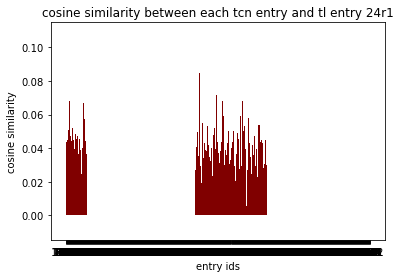

In [49]:
import matplotlib.pyplot as plt

current_id = '24r1'
data = entry_similarities[current_id]
courses = list(data.keys())
values = list(data.values())

max_index = values.index(max(values))
print(courses[max_index])


plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("entry ids")
plt.ylabel("cosine similarity")
plt.title("cosine similarity between each tcn entry and tl entry " + current_id)
plt.show()